# Exercise 3

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv ('EFIplus_medit.zip',compression="zip", sep= ";")

In [44]:
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [45]:
df.columns

Index(['Site_code', 'Latitude', 'Longitude', 'Country', 'Catchment_name',
       'Galiza', 'Subsample', 'Calib_EFI_Medit', 'Calib_connect',
       'Calib_hydrol',
       ...
       'Squalius malacitanus', 'Squalius pyrenaicus', 'Squalius torgalensis',
       'Thymallus thymallus', 'Tinca tinca', 'Zingel asper', 'Squalius sp',
       'Barbatula sp', 'Phoxinus sp', 'Iberochondrostoma_sp'],
      dtype='object', length=164)

In [46]:
df.iloc[0:5011,0:5]

,Site_code,Latitude,Longitude,Country,Catchment_name
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo
...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga


### Visualising Annual Mean Temperature for The 4 Highest Catchment

In [47]:
# Count the number of sampling sites per catchment and select the top 4
top_catchments = df["Catchment_name"].value_counts().nlargest(4).index
df_top = df[df["Catchment_name"].isin(top_catchments)]

# Set the figure size and style
sn.set_style("whitegrid")



C:\Users\Rayza\AppData\Local\Temp\ipykernel_25156\3889666017.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_top, x="Catchment_name", y="temp_ann", jitter=True, alpha=0.6, palette=color_palette, edgecolor=line_color, ax=axes[0, 0])
C:\Users\Rayza\AppData\Local\Temp\ipykernel_25156\3889666017.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x="Catchment_name", y="temp_ann", palette=color_palette,ax=axes[1, 0])
C:\Users\Rayza\AppData\Local\Temp\ipykernel_25156\3889666017.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  

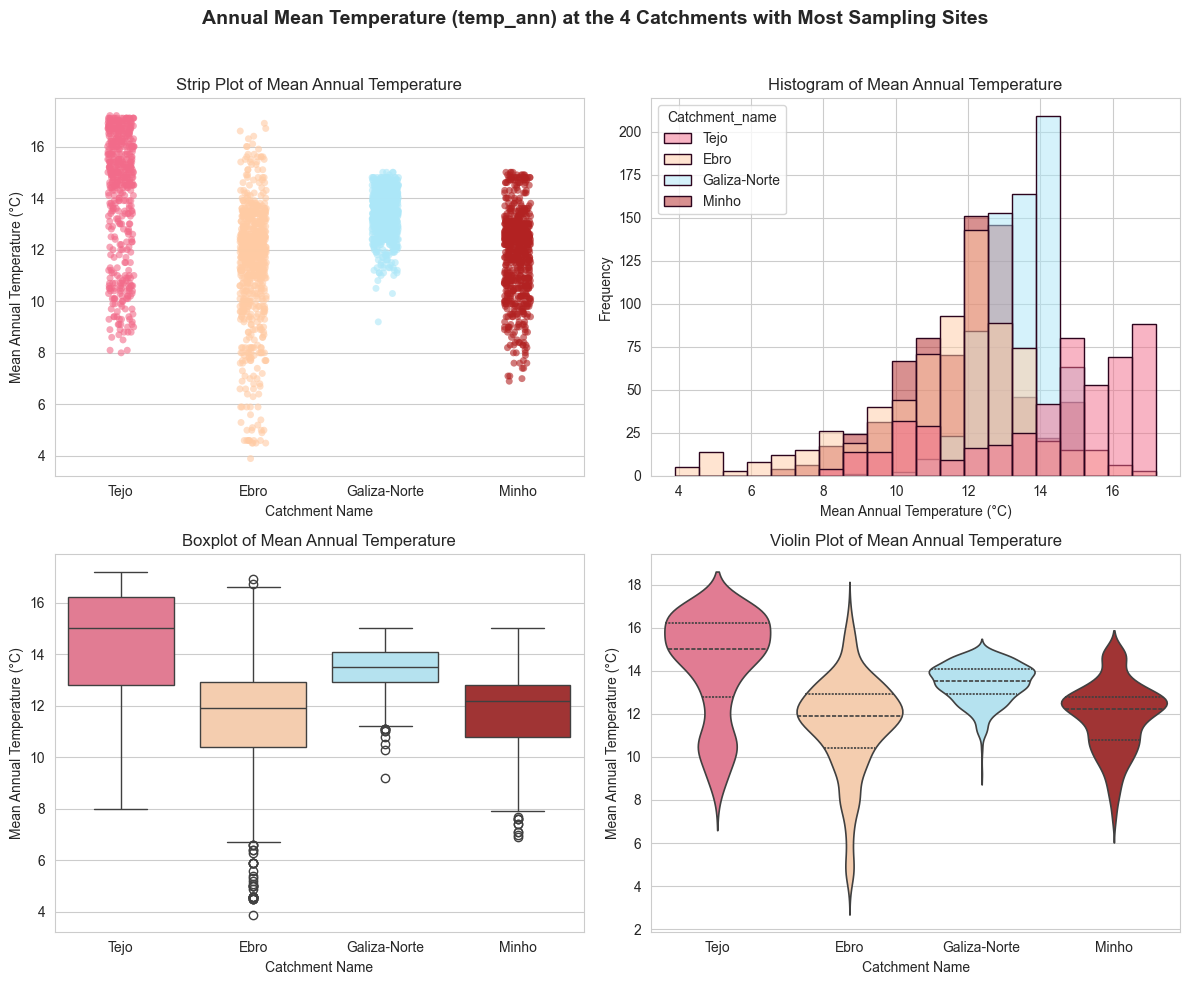

In [54]:
# Define the color palette
color_palette = ["#f26b8a", "#ffcba4", "#ace7f8", "#b22222"] 
line_color = "#2c041d"  # Maroon for boxplot edges

# Create the figure with 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Annual Mean Temperature (temp_ann) at the 4 Catchments with Most Sampling Sites", fontsize=14, fontweight='bold')

# Strip Plot
sns.stripplot(data=df_top, x="Catchment_name", y="temp_ann", jitter=True, alpha=0.6, palette=color_palette, edgecolor=line_color, ax=axes[0, 0])
axes[0, 0].set_title("Strip Plot of Mean Annual Temperature")
axes[0, 0].set_xlabel("Catchment Name")
axes[0, 0].set_ylabel("Mean Annual Temperature (°C)")

# Histogram 
sns.histplot(data=df_top, x="temp_ann", hue="Catchment_name", bins=20, palette=color_palette, edgecolor=line_color, ax=axes[0, 1])
axes[0, 1].set_title("Histogram of Mean Annual Temperature")
axes[0, 1].set_xlabel("Mean Annual Temperature (°C)")
axes[0, 1].set_ylabel("Frequency")

# Boxplot
sns.boxplot(data=df_top, x="Catchment_name", y="temp_ann", palette=color_palette,ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Mean Annual Temperature")
axes[1, 0].set_xlabel("Catchment Name")
axes[1, 0].set_ylabel("Mean Annual Temperature (°C)")

# Violin Plot
sns.violinplot(data=df_top, x="Catchment_name", y="temp_ann", palette=color_palette, inner="quartile", linewidth=1.2, ax=axes[1, 1])
axes[1, 1].set_title("Violin Plot of Mean Annual Temperature")
axes[1, 1].set_xlabel("Catchment Name")
axes[1, 1].set_ylabel("Mean Annual Temperature (°C)")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()


### Visualising Mean Values of Annual Values for A Variety of Sample Sizes

In [49]:
sample_sizes = [10, 25, 50, 100, 200, 300, 500]
num_samples = 1000


In [50]:
# Store results
mean_values = {size: [] for size in sample_sizes}

# Perform sampling
for size in sample_sizes:
    for _ in range(num_samples):
        sample = df["temp_ann"].sample(n=size, replace=True)
        mean_values[size].append(sample.mean())

In [51]:
mean_df = pd.DataFrame([(size, mean) for size in sample_sizes for mean in mean_values[size]], columns=["Sample Size", "Mean Temp"])

print(mean_df)

      Sample Size  Mean Temp
0              10  14.070000
1              10  13.188889
2              10  13.860000
3              10  12.600000
4              10  14.100000
...           ...        ...
6995          500  13.190041
6996          500  13.359705
6997          500  13.191701
6998          500  13.312211
6999          500  13.035849

[7000 rows x 2 columns]


C:\Users\Rayza\AppData\Local\Temp\ipykernel_25156\1387686605.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x="Sample Size", y="Mean Temp", data=mean_df, color="#f26b8a", label="Sample Means", ci="sd")


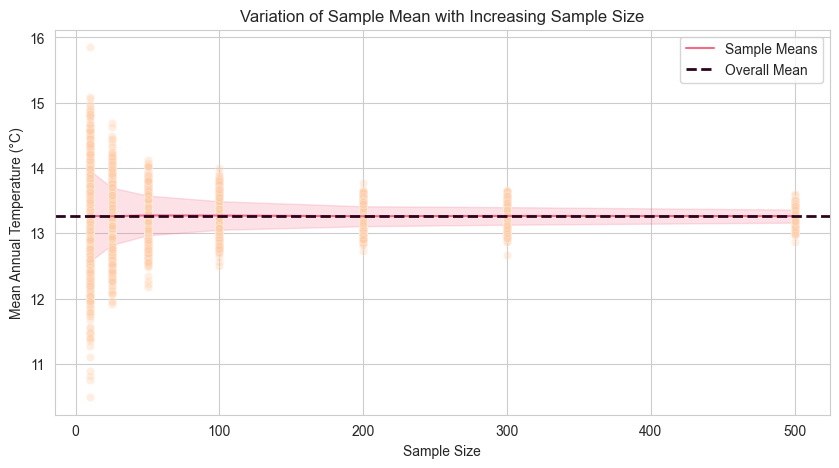

In [55]:
# Compute overall mean temperature for reference line
overall_mean = df["temp_ann"].mean()

# Plot Sample Mean Variation
plt.figure(figsize=(10, 5))
sns.lineplot(x="Sample Size", y="Mean Temp", data=mean_df, color="#f26b8a", label="Sample Means", ci="sd")
sns.scatterplot(x="Sample Size", y="Mean Temp", data=mean_df, color="#ffcba4", alpha=0.3)
plt.axhline(y=overall_mean, color="#2c041d", linestyle="dashed", linewidth=2, label="Overall Mean")

plt.xlabel("Sample Size")
plt.ylabel("Mean Annual Temperature (°C)")
plt.title("Variation of Sample Mean with Increasing Sample Size")
plt.legend()
plt.show()